In [1]:
# Import modules
# ipython magic to plot in line
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#plt.style.use('ggplot')
# better colors (http://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib)
plt.rcParams.update({'figure.max_open_warning': 0})
import xarray as xr
from astropy.io import ascii
import pytz
# OS interaction
import sys
import os

In [2]:
# Directories
# Path to raw data
#file_in   = os.path.normpath(r'F:\Work\e\Data\Obs\Canada_Project_Sites\Nov_2014_snow_storm_data\Fortress_Pre_telemetry_QC_data\QC_netcdf\CRHO.nc')
file_in   = os.path.normpath(r'C:\Users\new356\Google Drive\Nov2014 Data QC Completed Data\CRHO_Combined_Netcdf\CRHO_1hour.nc')
# file_in   = os.path.normpath(r'C:\Users\new356\Google Drive\Nov2014 Data QC Completed Data\CRHO_Combined_Netcdf\CRHO_15min.nc')

In [3]:
# Set font size
font = {'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)

In [4]:
# Import stations of interest
CRHO_data = xr.open_dataset(file_in,engine='netcdf4')

In [5]:
# Sort variables by alpha
AllVars = sorted(CRHO_data.data_vars)
AllVars

['AirMoistureContentA',
 'AirtemperatureA',
 'DownwardSolarRadiation',
 'DownwardTerrestrialRad',
 'IncrementalPrecipitationA',
 'IncrementalPrecipitationB',
 'IncrementalPrecipitationC',
 'SPH',
 'ScalarWindSpeedA',
 'ScalarWindSpeedB',
 'ScalarWindSpeedC',
 'SnowDepthA',
 'SnowDepthQCvalue',
 'SnowLayerTemperatureA',
 'SnowWaterEquivelentA',
 'SoilHeatFluxA',
 'SoilMoistureA',
 'SoilMoistureB',
 'SoilMoistureC',
 'SoilMoistureD',
 'SoilMoistureE',
 'SoilTemperatureA',
 'SoilTemperatureB',
 'SoilTemperatureC',
 'SoilTemperatureD',
 'SoilTemperatureE',
 'TotalPressureAdjustedtoSea-level',
 'TotalPressureUnadjustedA',
 'UpwardSolarRadiation',
 'UpwardTerrestrialRad',
 'WindDirectionatA']

In [6]:
# Remove metadata (and variables that are empty (i.e. diagnostic ones))
# [AllVars.remove(cV) for cV in ['Elevation','Lat','Lon','SnowDepthQCvalue','SnowLayerTemperatureA']]
# [AllVars.remove(cV) for cV in ['Elevation','Lat','Lon']]

In [7]:
CRHO_data

<xarray.Dataset>
Dimensions:                           (station: 19, time_hrly: 101780)
Coordinates:
  * time_hrly                         (time_hrly) datetime64[ns] 2005-03-10T16:00:00 ...
    Elevation                         (station) float64 ...
    Lat                               (station) float64 ...
    Lon                               (station) float64 ...
  * station                           (station) object 'BNS' 'BRP' 'BWH' ...
    network                           (station) object ...
Data variables:
    IncrementalPrecipitationB         (time_hrly, station) float64 ...
    WindDirectionatA                  (time_hrly, station) float64 ...
    TotalPressureUnadjustedA          (time_hrly, station) float64 ...
    SoilTemperatureB                  (time_hrly, station) float64 ...
    DownwardSolarRadiation            (time_hrly, station) float64 ...
    SoilTemperatureA                  (time_hrly, station) float64 ...
    SoilTemperatureD                  (time_hrly, st

AirMoistureContentA
AirtemperatureA
DownwardSolarRadiation
DownwardTerrestrialRad
IncrementalPrecipitationA
IncrementalPrecipitationB
IncrementalPrecipitationC
SPH
ScalarWindSpeedA
ScalarWindSpeedB
ScalarWindSpeedC
SnowDepthA
SnowDepthQCvalue
SnowLayerTemperatureA
SnowWaterEquivelentA
SoilHeatFluxA
SoilMoistureA
SoilMoistureB
SoilMoistureC
SoilMoistureD
SoilMoistureE
SoilTemperatureA
SoilTemperatureB
SoilTemperatureC
SoilTemperatureD
SoilTemperatureE
TotalPressureAdjustedtoSea-level
TotalPressureUnadjustedA
UpwardSolarRadiation
UpwardTerrestrialRad
WindDirectionatA


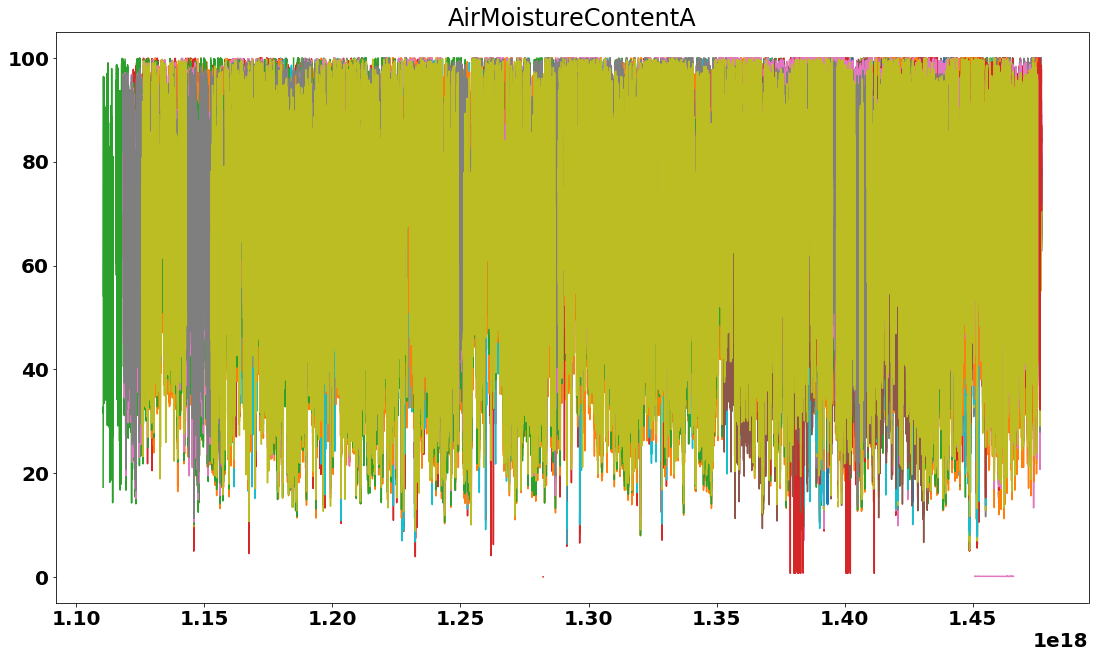

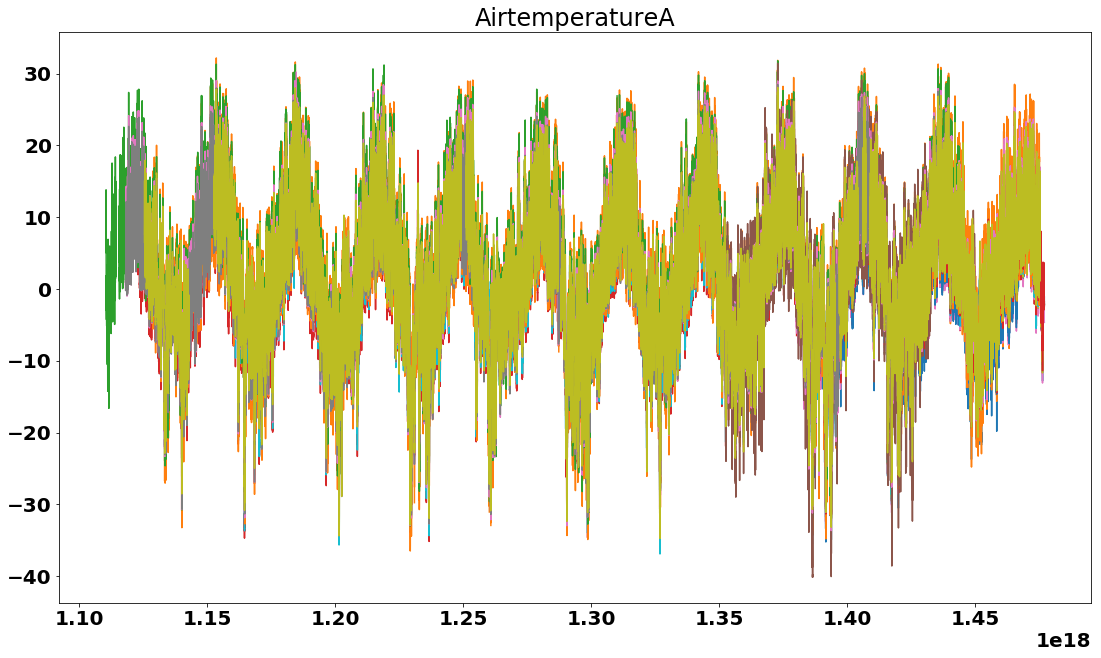

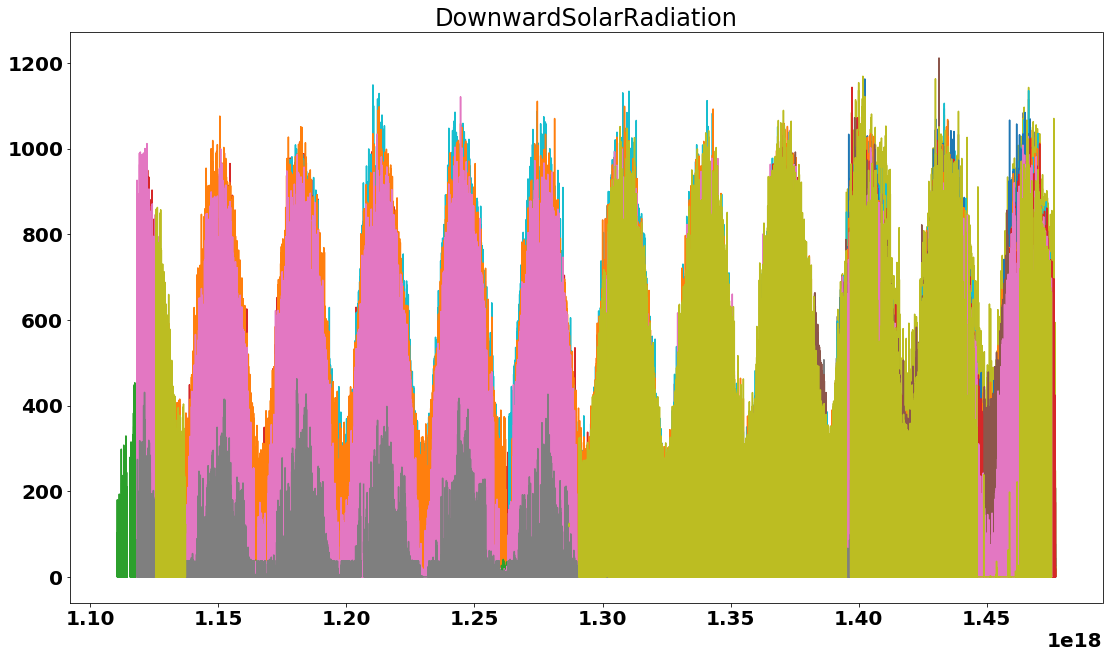

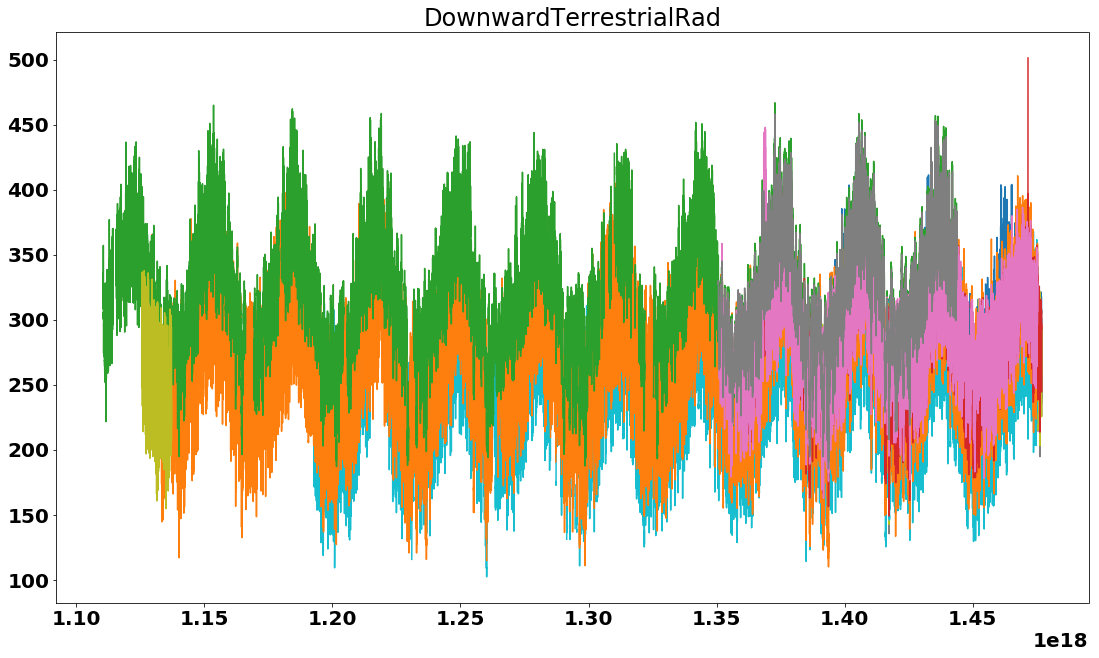

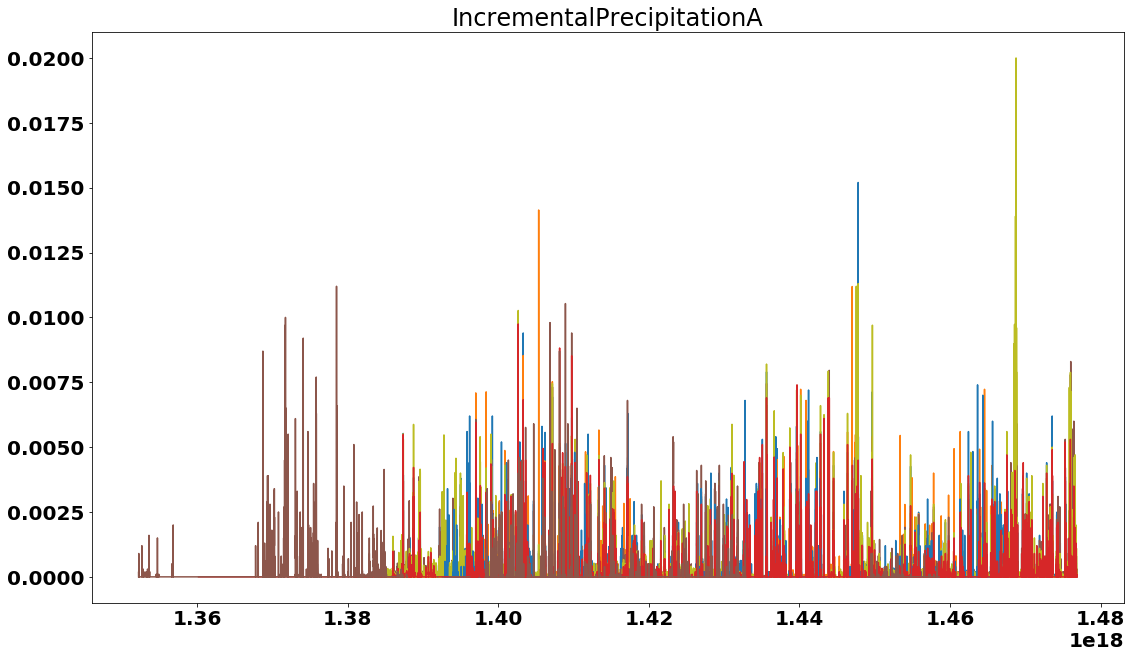

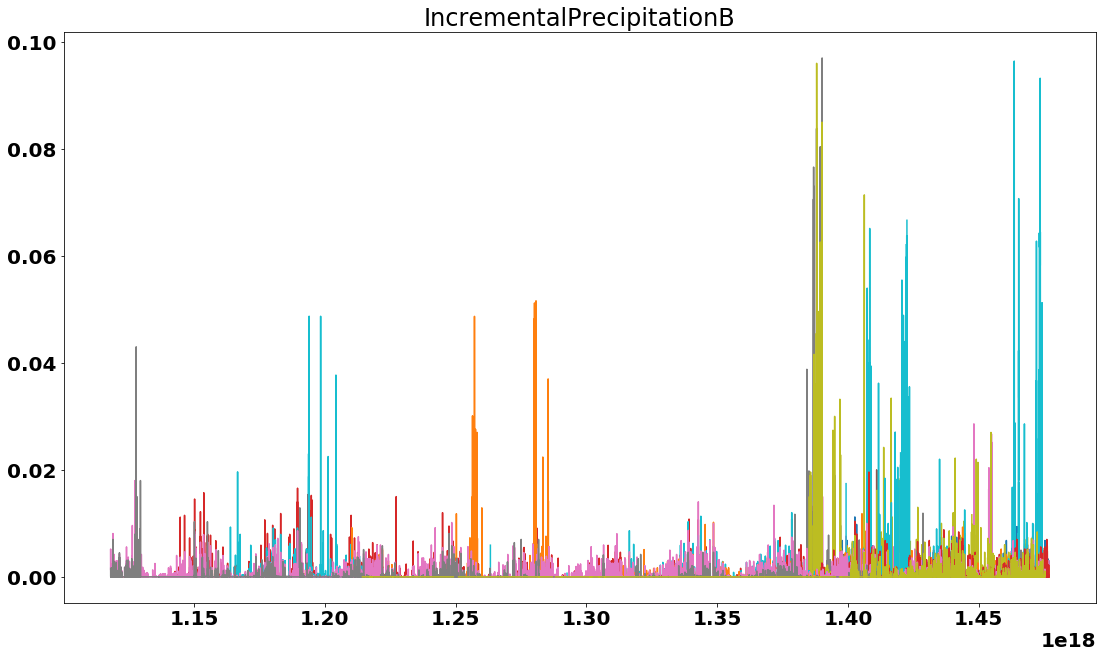

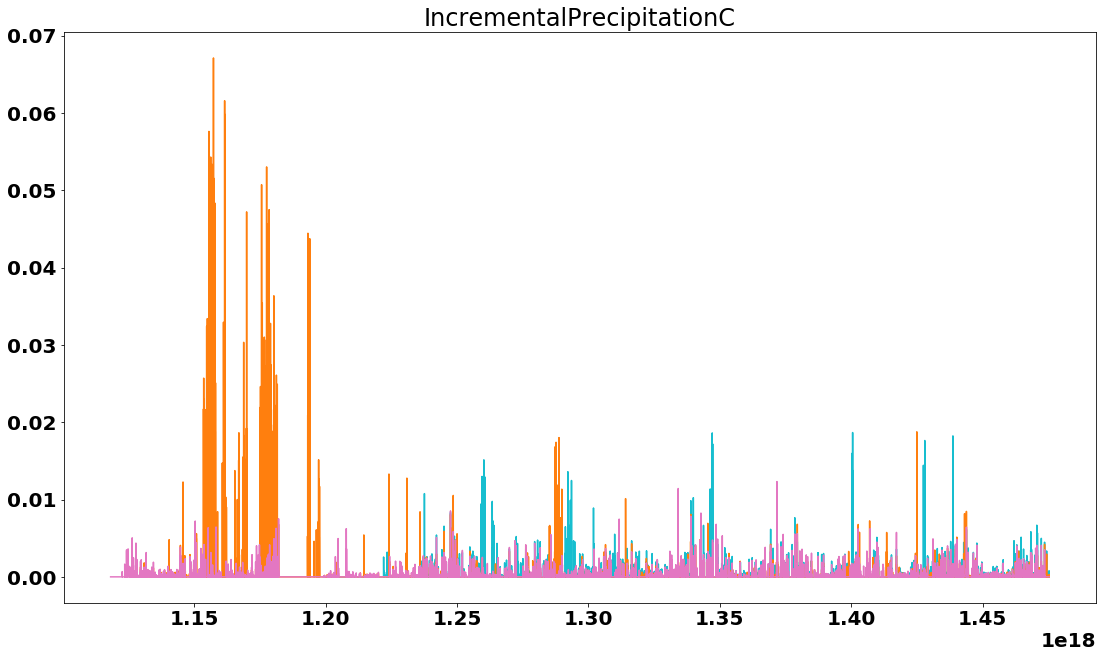

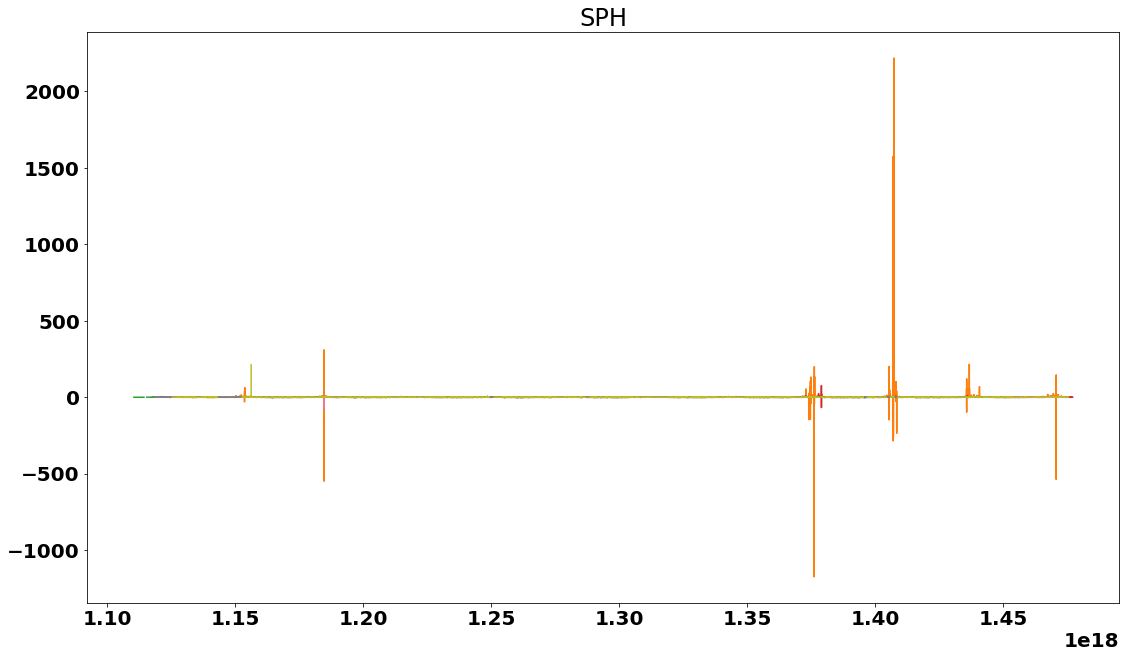

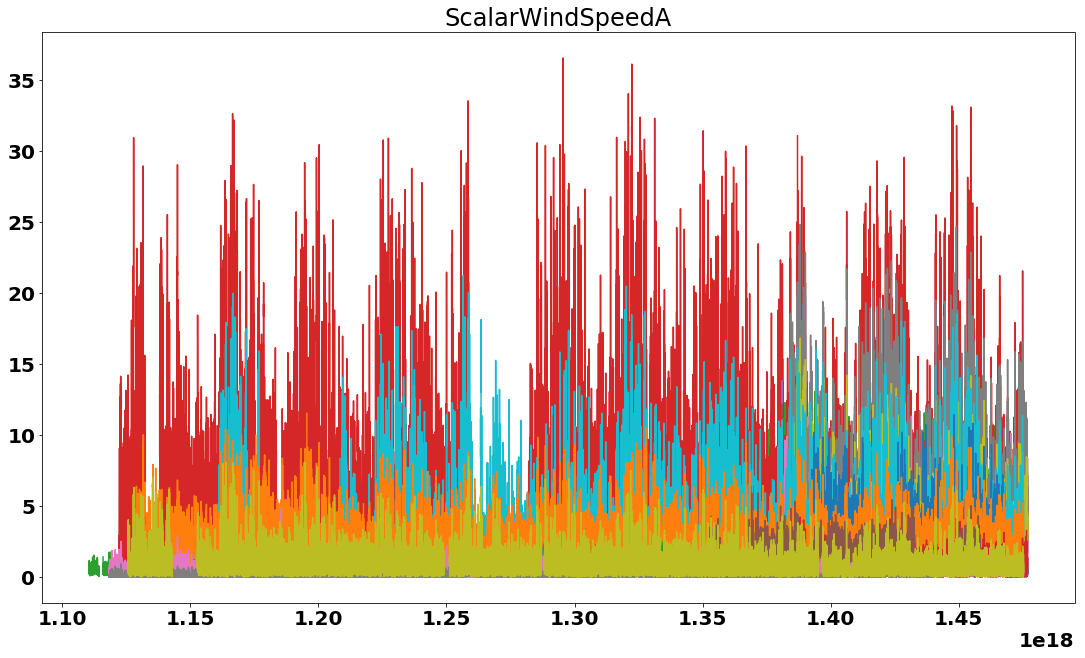

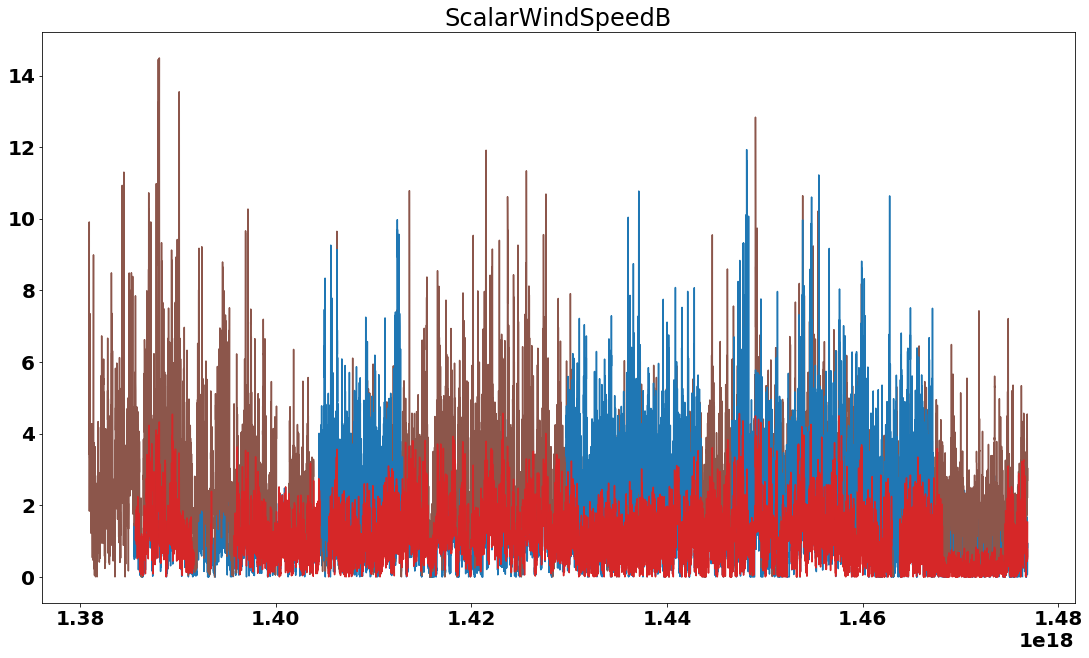

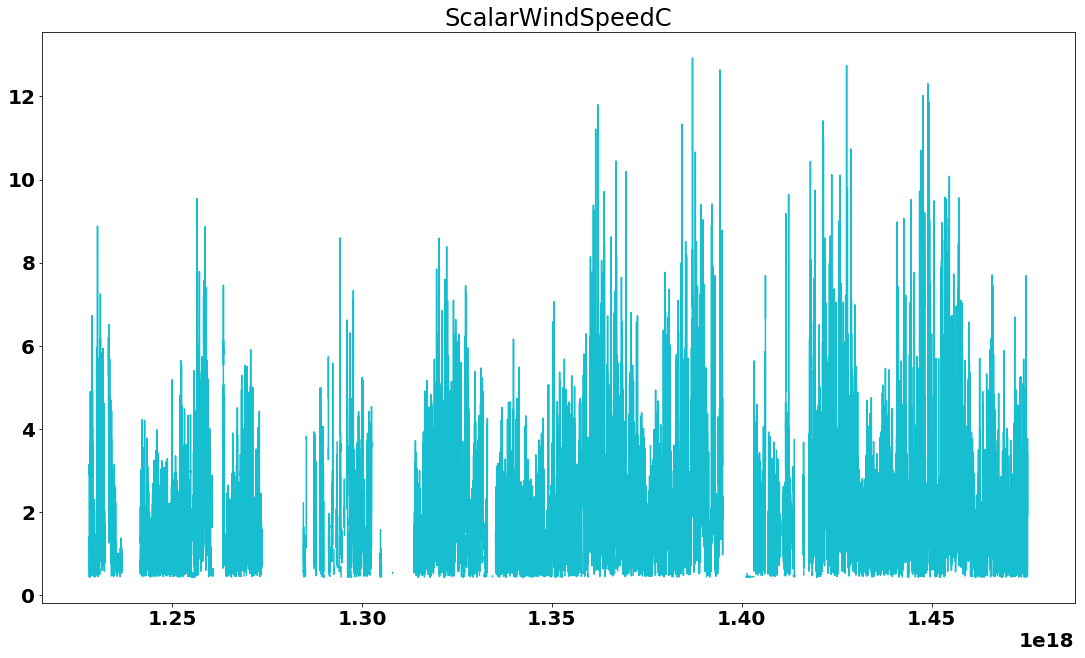

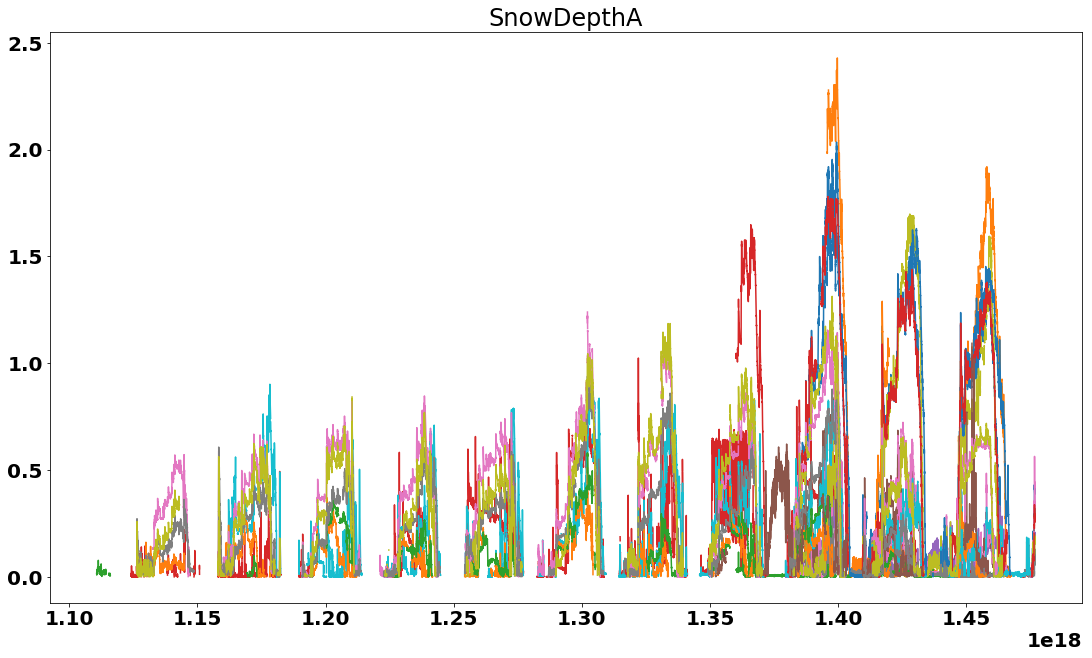

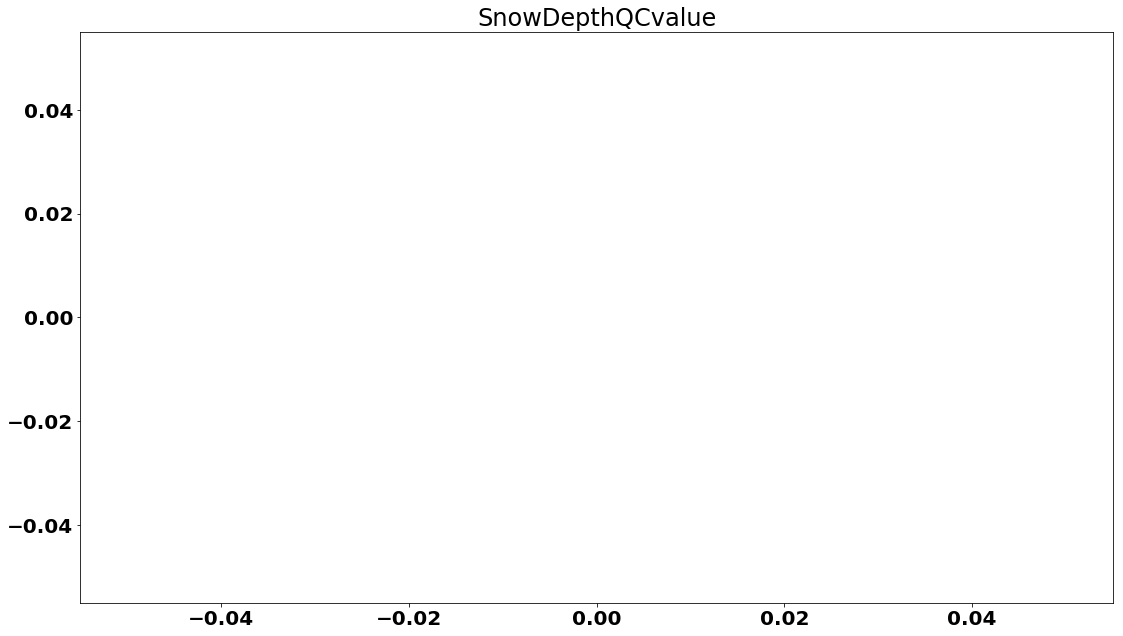

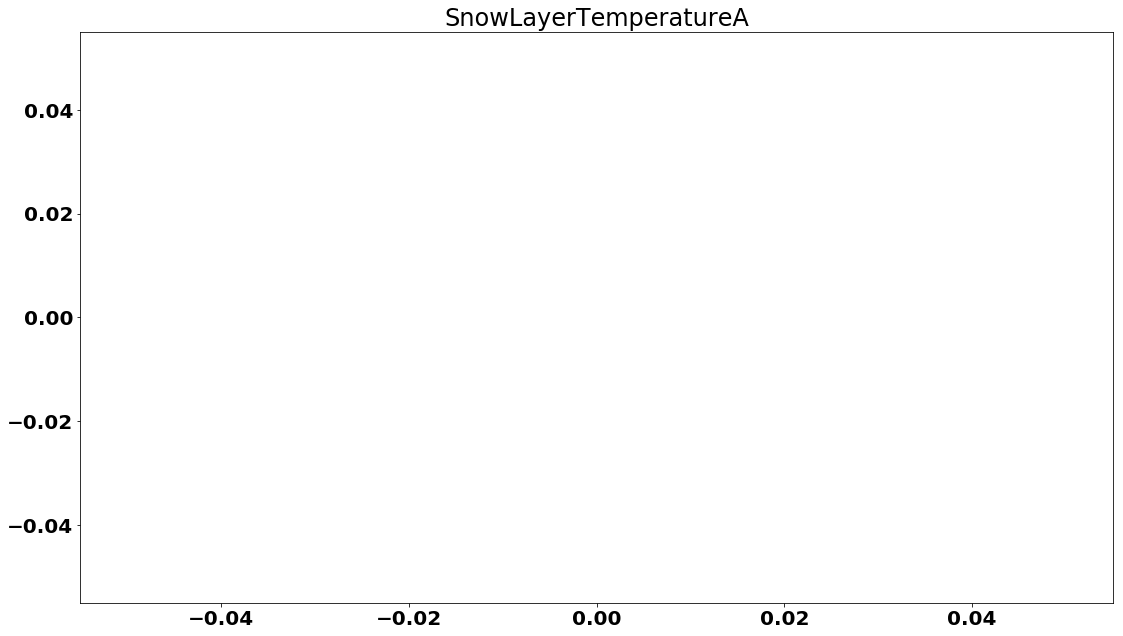

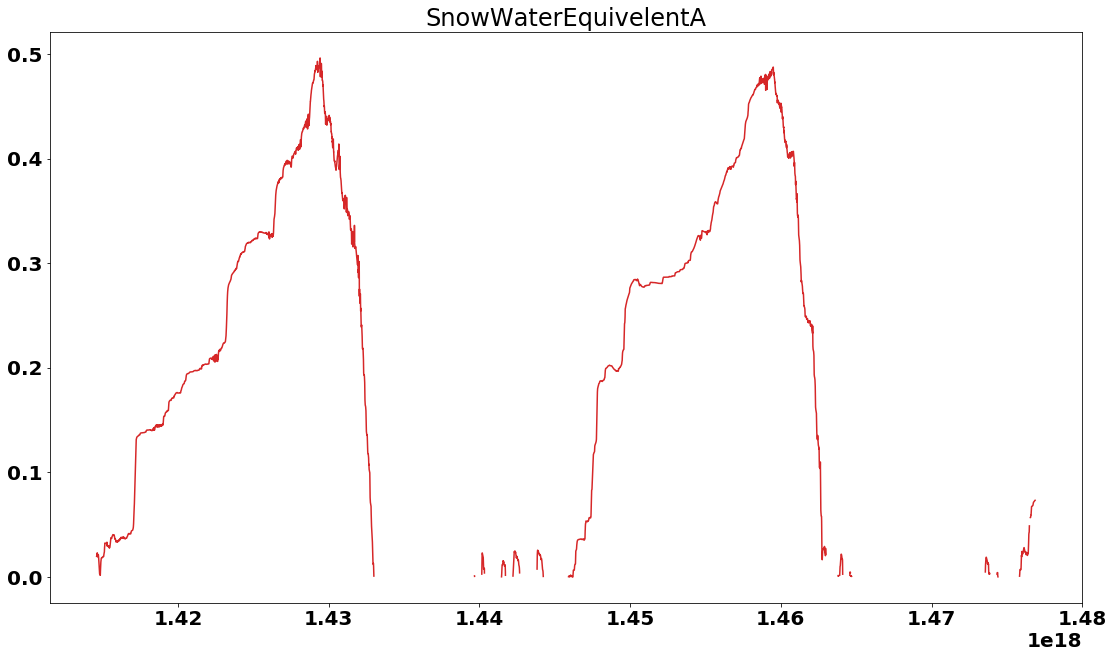

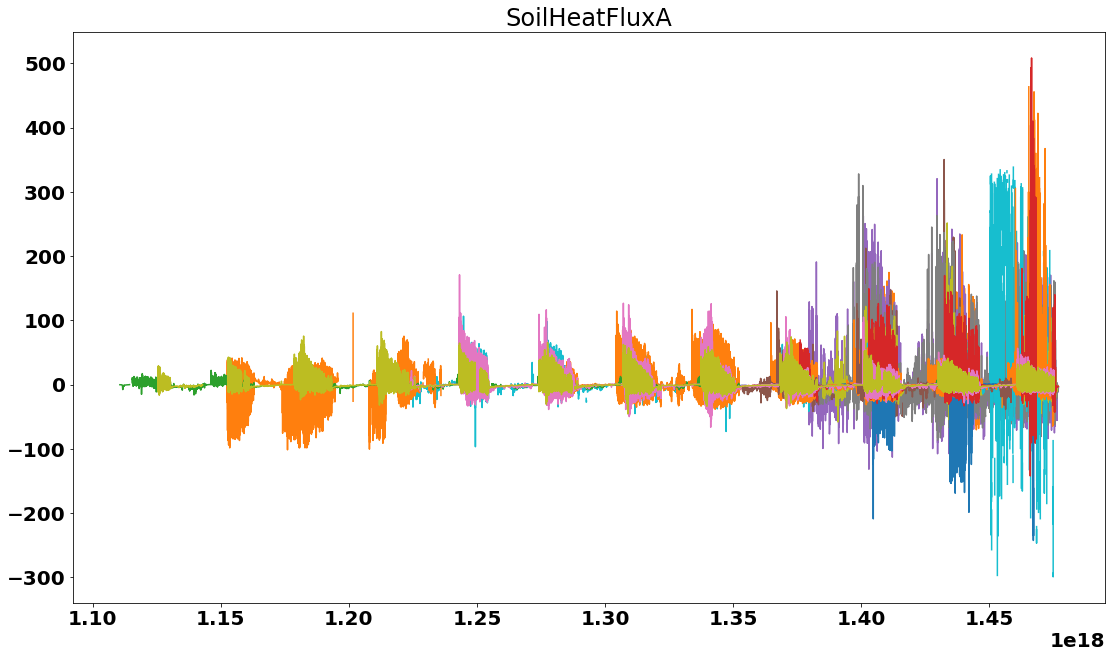

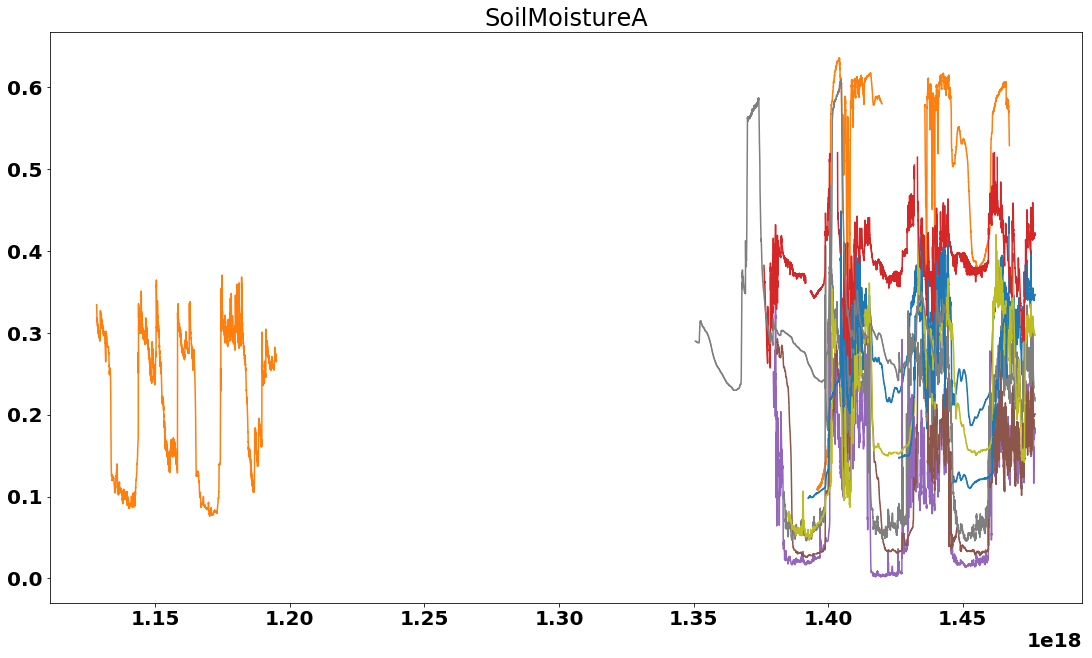

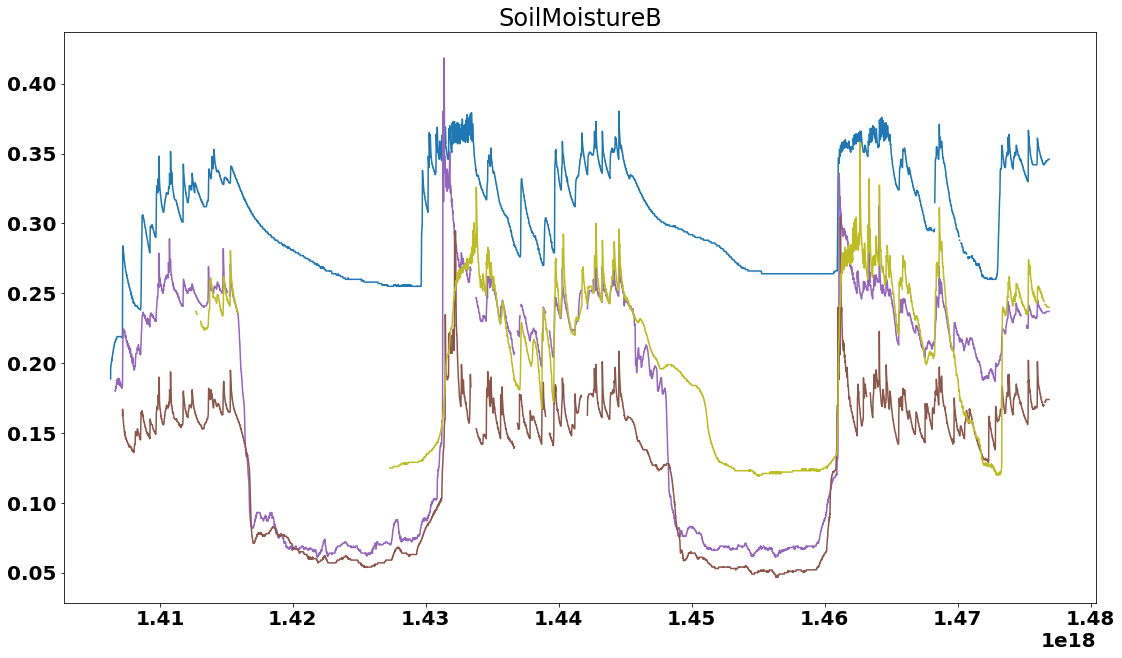

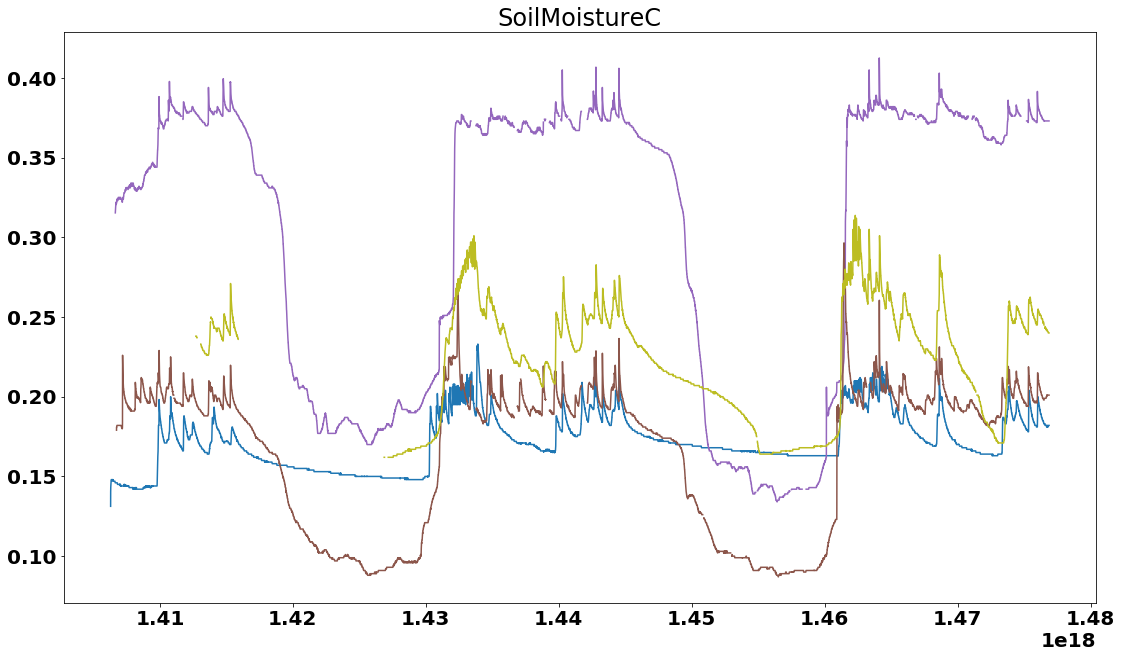

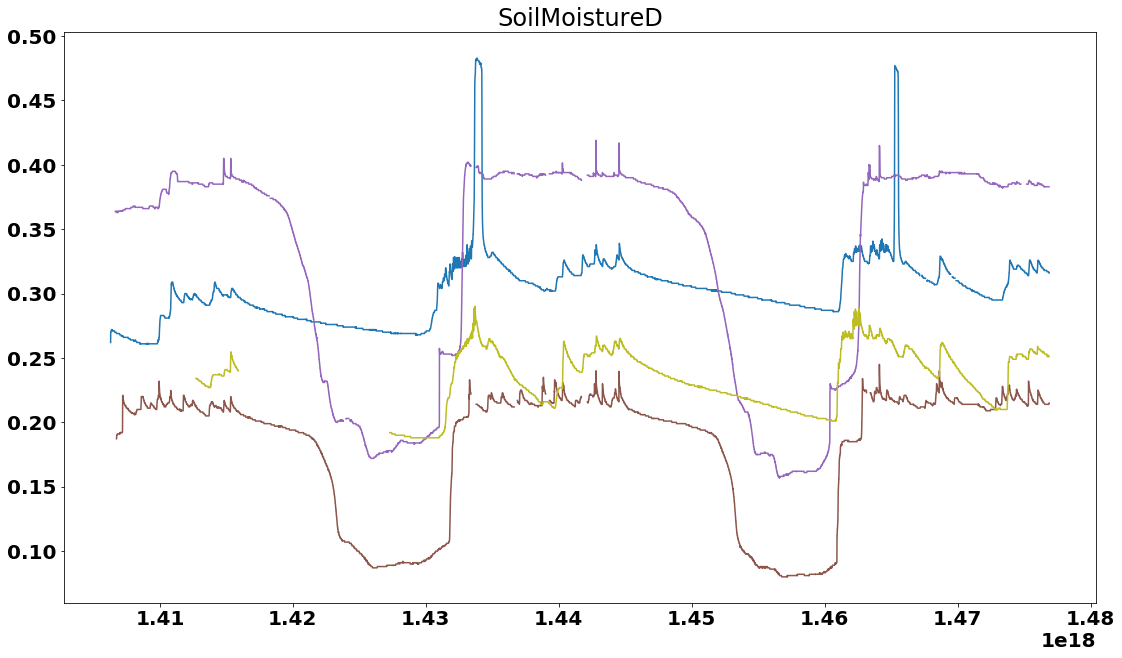

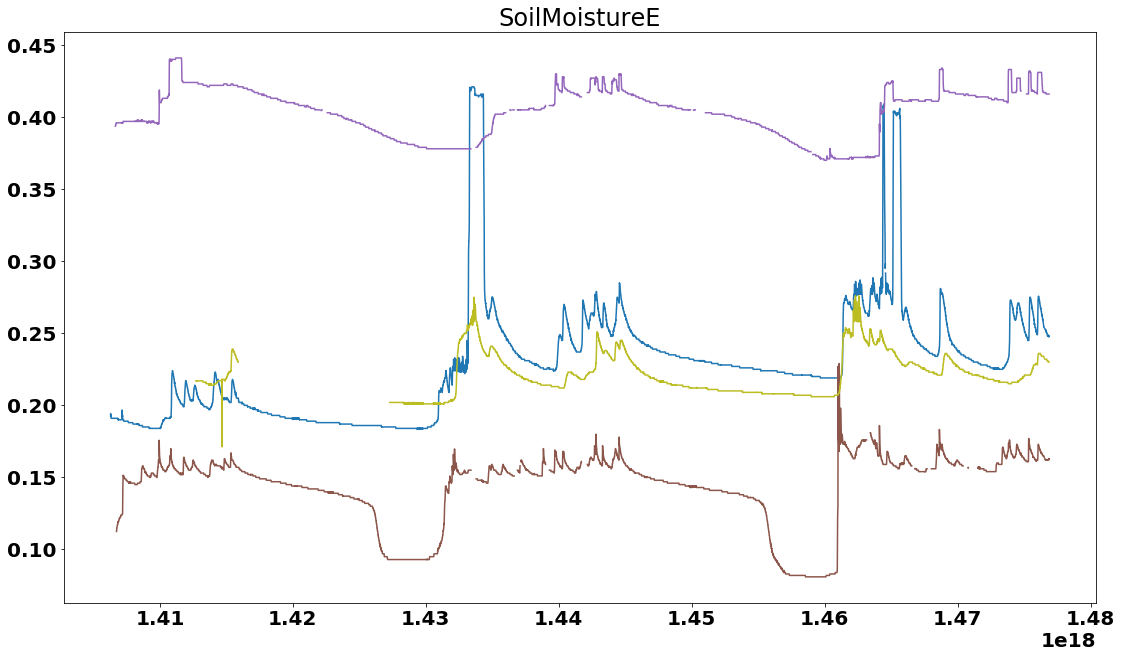

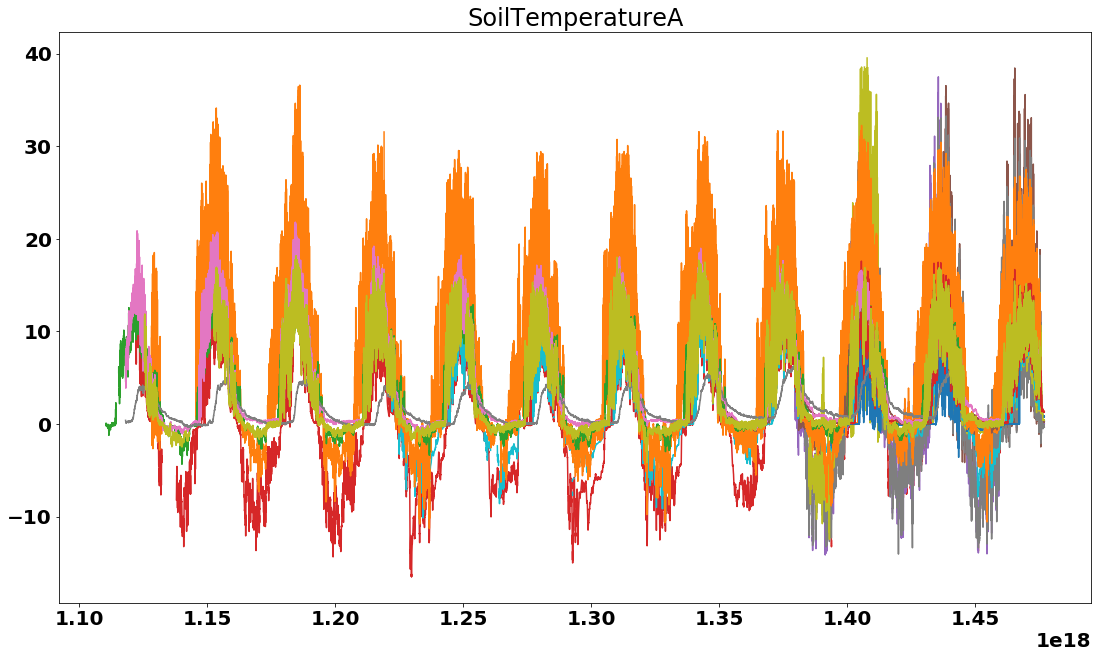

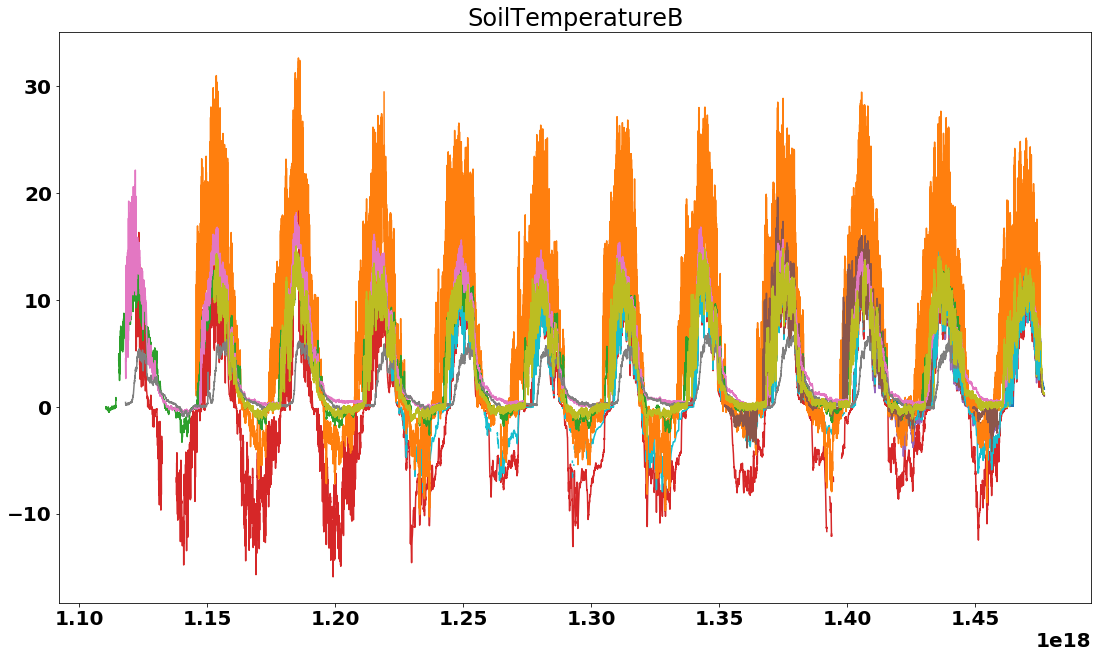

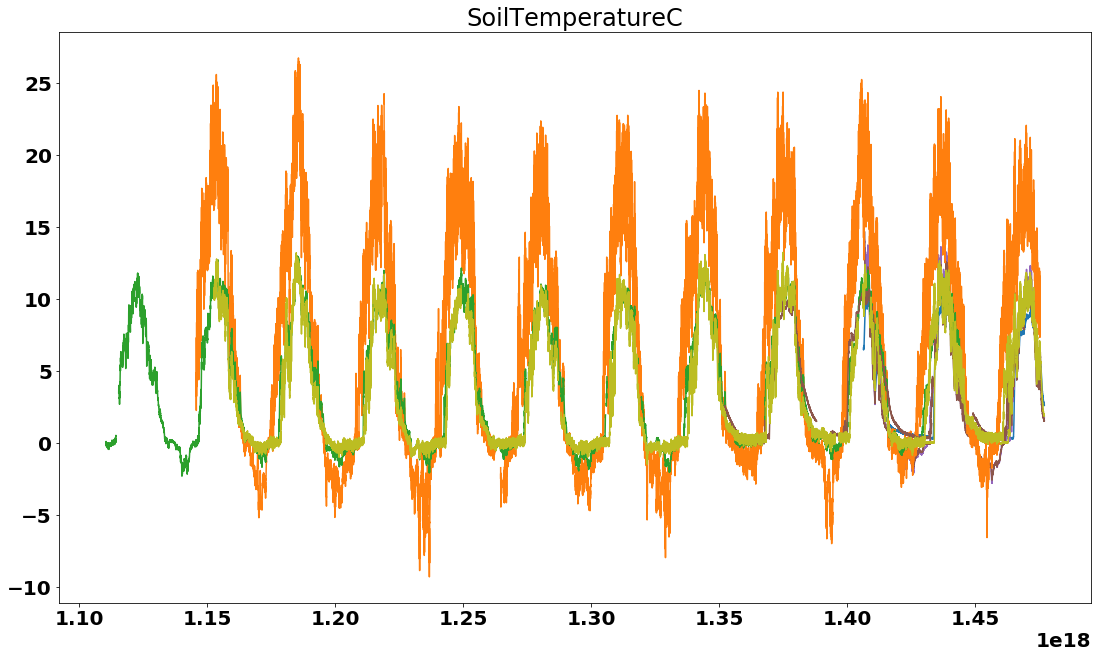

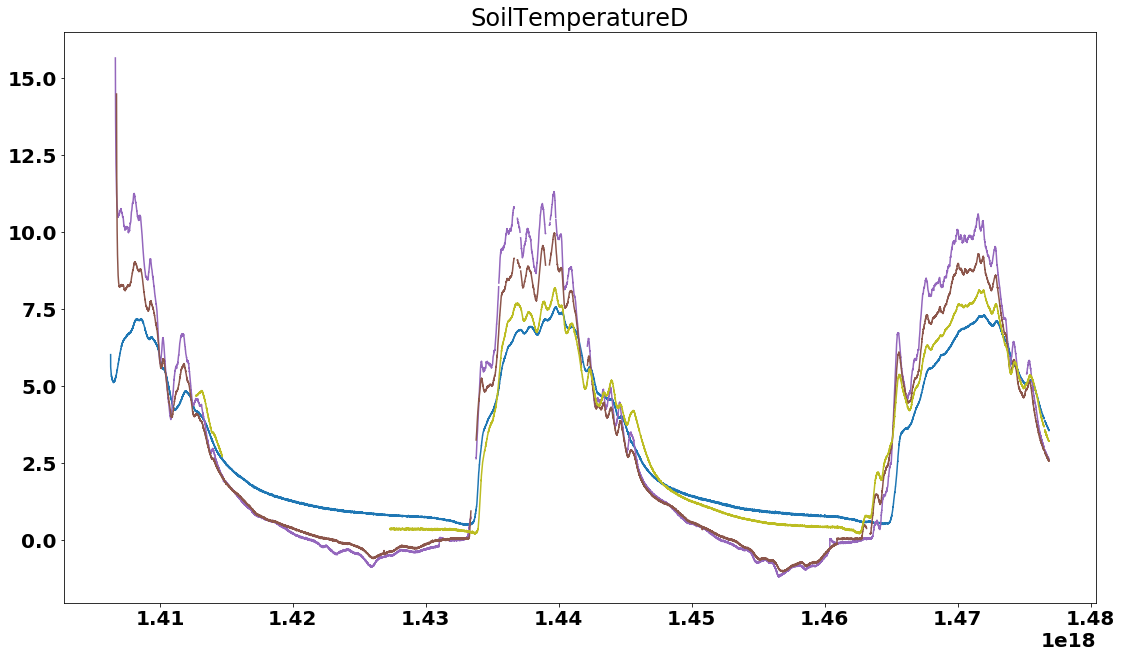

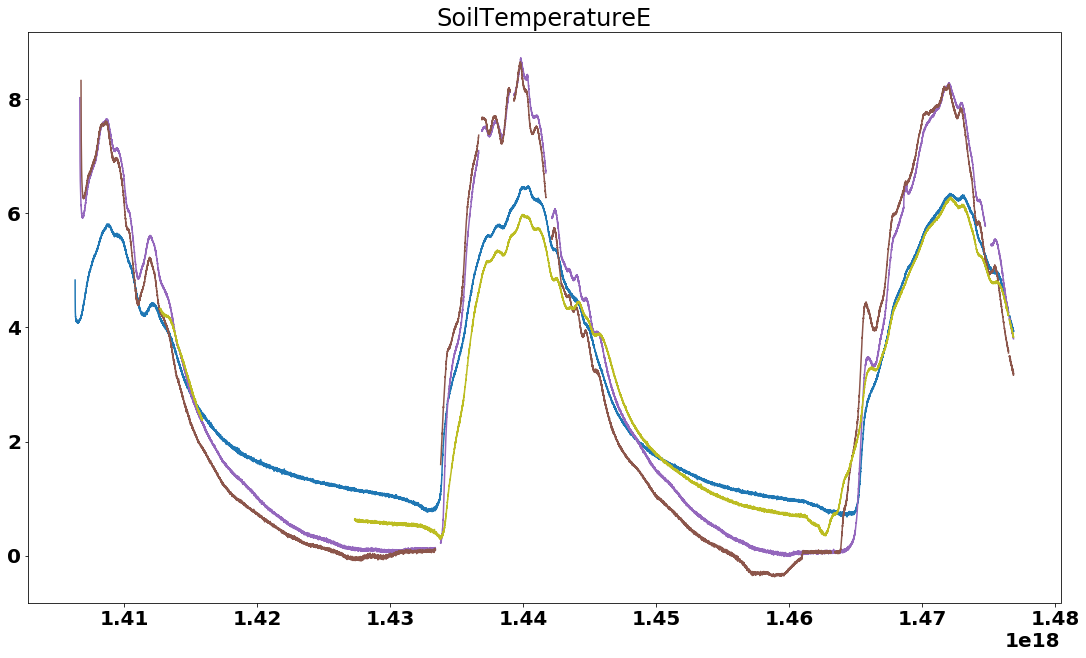

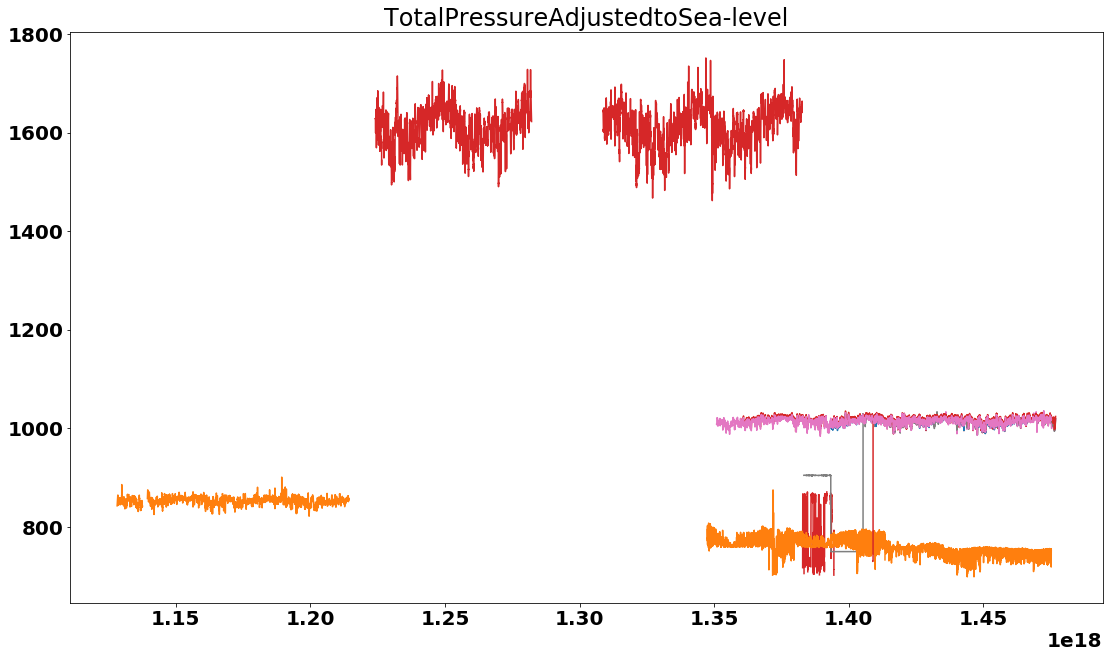

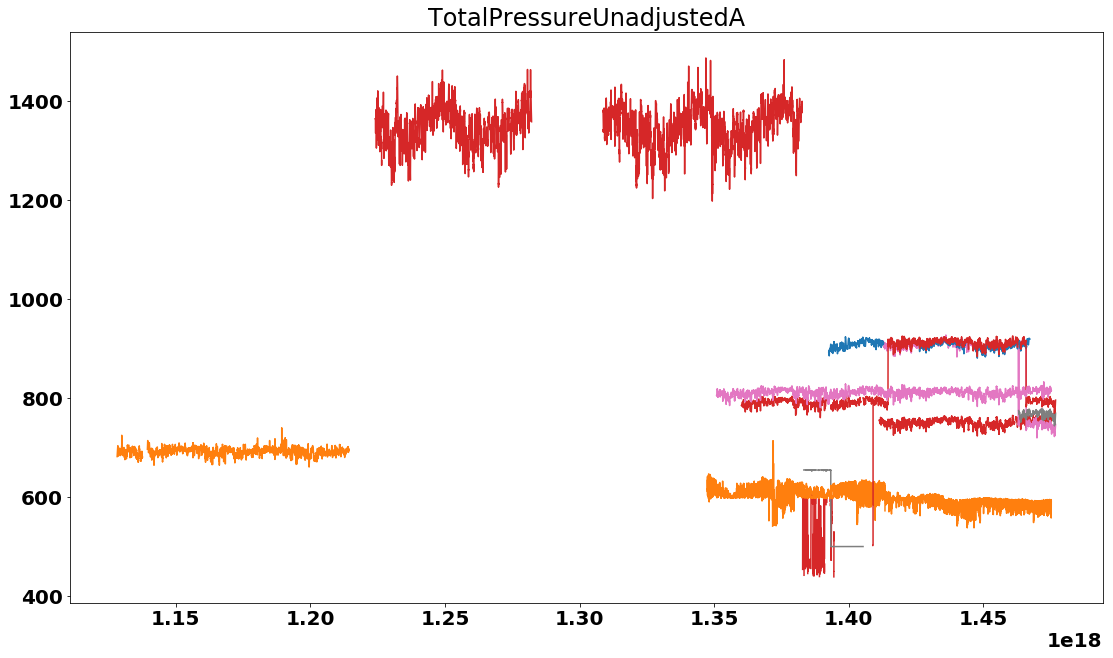

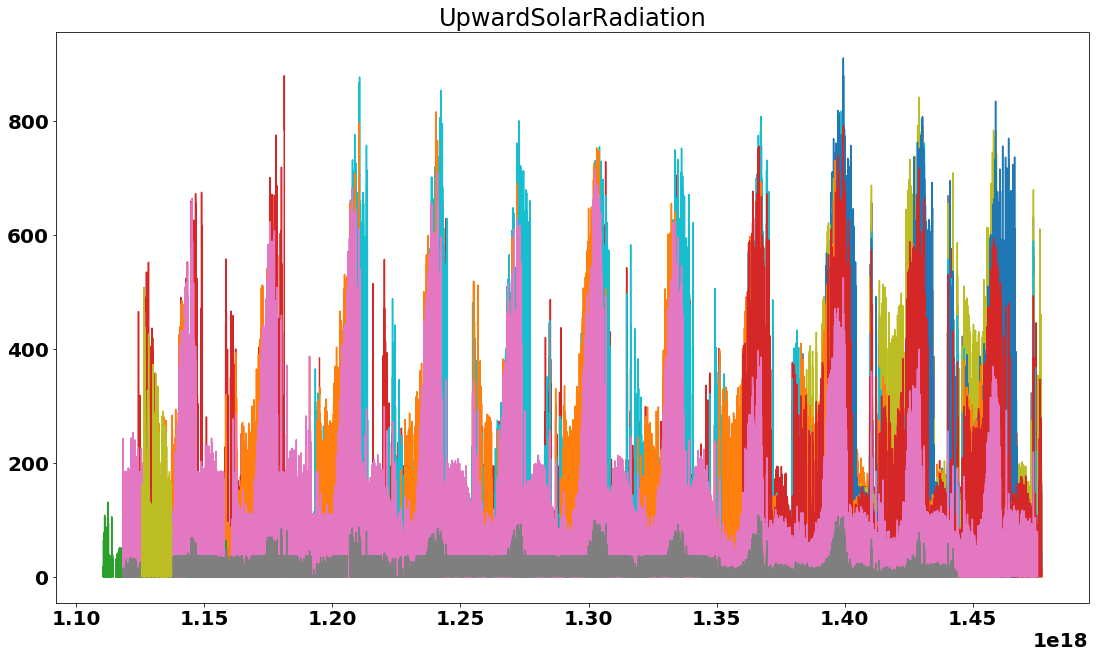

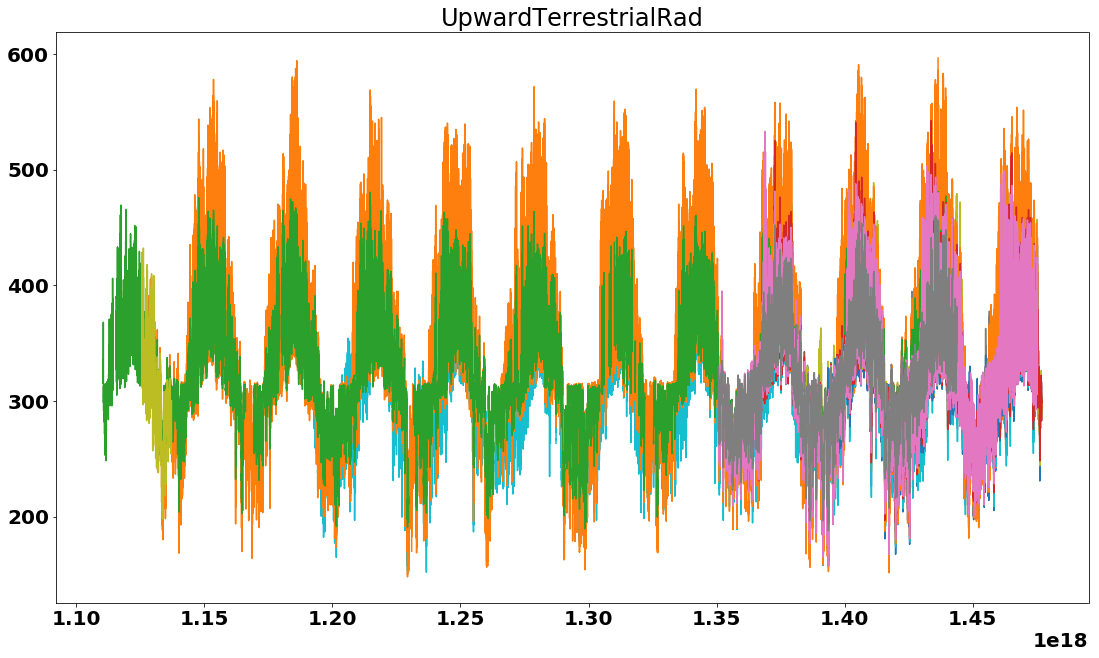

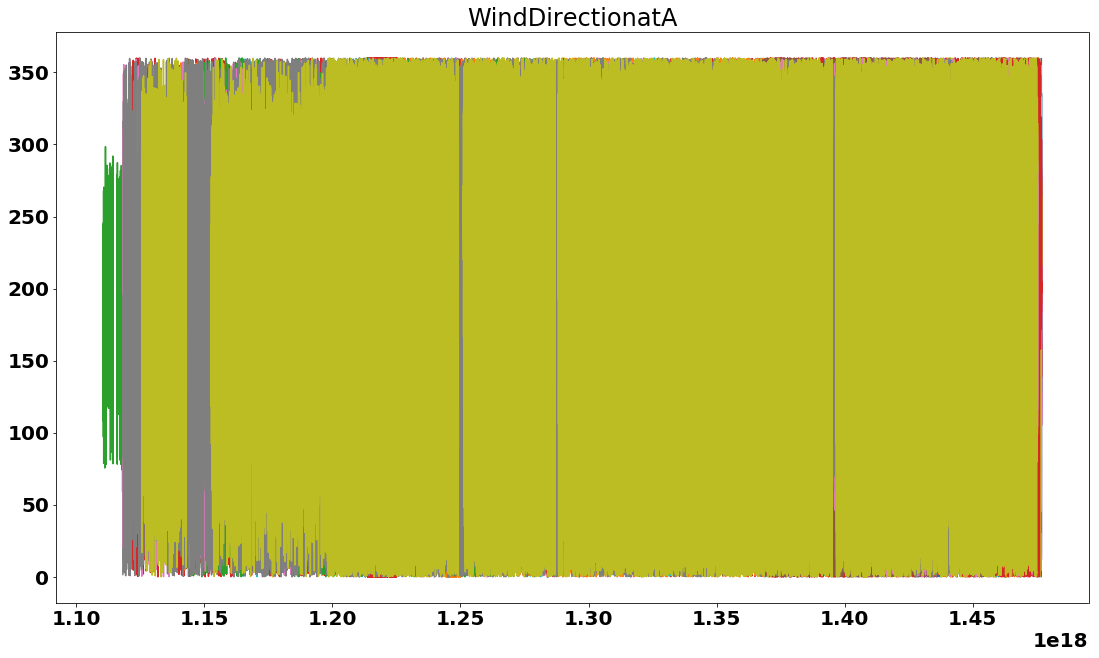

In [8]:
# Plot each variable (Takes a while, be patient)
#NUM_COLORS = 15
#cm = plt.get_cmap('Set1')
for cvar in np.sort(AllVars):
    print(cvar)
    plt.figure()
    X = CRHO_data[cvar]
    plt.plot(X.time_hrly, X.values);
    plt.title(cvar)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5,forward=True)
    plt.axis("tight");

In [9]:
# # Plot each variable (Takes a while, be patient)
# #NUM_COLORS = 15
# #cm = plt.get_cmap('Set1')
# for cvar in np.sort(AllVars):
#     print(cvar)
#     pd_temp = CRHO_data[cvar].to_dataframe()
#     X = pd_temp.unstack().T
#     X.index = X.index.droplevel()
#     X.plot()
#     #ax = plt.gca()
#     #ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
#     plt.title(cvar)
#     fig = plt.gcf()
#     fig.set_size_inches(18.5, 10.5,forward=True)
#     plt.ylabel(CRHO_data[cvar].attrs['unit'])
#     plt.axis("tight");